In [14]:
import torch
import torch.nn as nn
import numpy
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from sklearn.datasets import fetch_olivetti_faces


In [27]:
BATCH_SIZE = 10
epochs = 50
lr = 0.01


In [16]:
# 数据加载
olivetti_faces = fetch_olivetti_faces(data_home=r'./face_data',shuffle=True)
print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.images.shape)


(400, 4096)
(400,)
(400, 64, 64)


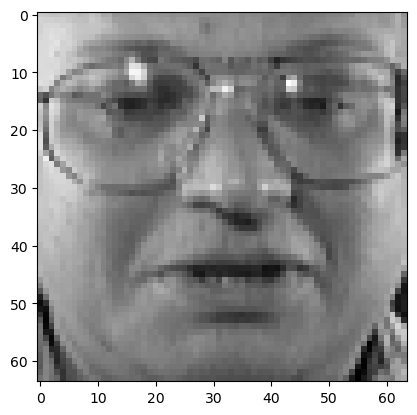

30


In [17]:
import matplotlib.pyplot as plt

face = olivetti_faces.images[1]
plt.imshow(face,cmap='gray')
plt.show()
print(olivetti_faces.target[1])

In [18]:
images = torch.tensor(olivetti_faces.data)
targets = torch.tensor(olivetti_faces.target)

In [19]:
images.shape

torch.Size([400, 4096])

In [20]:
targets.shape

torch.Size([400])

In [21]:
dataset = [(img,lbl) for img,lbl in zip(images,targets)]
dataloader = DataLoader(dataset,batch_size=BATCH_SIZE,shuffle=True)


In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [23]:
model = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.BatchNorm1d(8192),
    nn.ReLU(),
    nn.Linear(8192,16438),
    nn.BatchNorm1d(16438),
    nn.ReLU(),
    nn.Linear(16438,1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(1024,40)
).to(device)
model

Sequential(
  (0): Linear(in_features=4096, out_features=8192, bias=True)
  (1): BatchNorm1d(8192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=8192, out_features=16438, bias=True)
  (4): BatchNorm1d(16438, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=16438, out_features=1024, bias=True)
  (7): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=1024, out_features=40, bias=True)
)

In [28]:
# 优化器
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
# 损失函数
loss_fn = nn.CrossEntropyLoss()

loss_arr = []
# 模型训练
for epoch in range(epochs):
    # 提取训练数据
    for data, target in dataloader:
        target = torch.tensor(target).to(device)
        data = data.to(device)
        # 前向运算
        output = model(data)
        # 计算损失
        loss = loss_fn(output, target.long())
        # 反向传播
        optimizer.zero_grad() # 所有参数梯度清零
        loss.backward() # 计算梯度，保存到.grad
        optimizer.step() # 更新参数
        
    print(f'Epoch {epoch}, Loss {loss.item()}')
    loss_arr.append(loss.item())


C:\Users\lisheng\AppData\Local\Temp\ipykernel_26828\1242936927.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target).to(device)


Epoch 0, Loss 0.5595912933349609
Epoch 1, Loss 0.07922608405351639
Epoch 2, Loss 0.42138004302978516
Epoch 3, Loss 0.10408531129360199
Epoch 4, Loss 0.009168490767478943
Epoch 5, Loss 1.996828317642212
Epoch 6, Loss 0.03691094368696213
Epoch 7, Loss 0.004390996880829334
Epoch 8, Loss 0.0007261035498231649
Epoch 9, Loss 2.3282244205474854
Epoch 10, Loss 1.2781918048858643
Epoch 11, Loss 0.3618326783180237
Epoch 12, Loss 0.005094063933938742
Epoch 13, Loss 0.0006529869278892875
Epoch 14, Loss 0.00016435586439911276
Epoch 15, Loss 0.0021556387655436993
Epoch 16, Loss 0.023267319425940514
Epoch 17, Loss 0.9602639079093933
Epoch 18, Loss 1.5037952661514282
Epoch 19, Loss 0.5858142971992493
Epoch 20, Loss 0.005667752120643854
Epoch 21, Loss 0.09055349230766296
Epoch 22, Loss 0.0016585519770160317
Epoch 23, Loss 0.00014105404261499643
Epoch 24, Loss 0.00017735324217937887
Epoch 25, Loss 0.4563557505607605
Epoch 26, Loss 0.00020615938410628587
Epoch 27, Loss 0.0004861931374762207
Epoch 28, Los

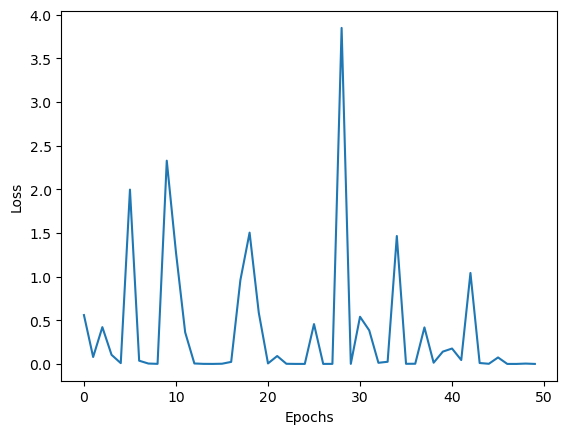

In [30]:
import matplotlib.pyplot as plt

plt.plot(loss_arr)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()